In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from category_encoders import HashingEncoder
from minisom import MiniSom

## Loading the dataset

In [2]:
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## EDA

### Numerical features

In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
numeric_features = train_data.select_dtypes(np.number).columns
numeric_features

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

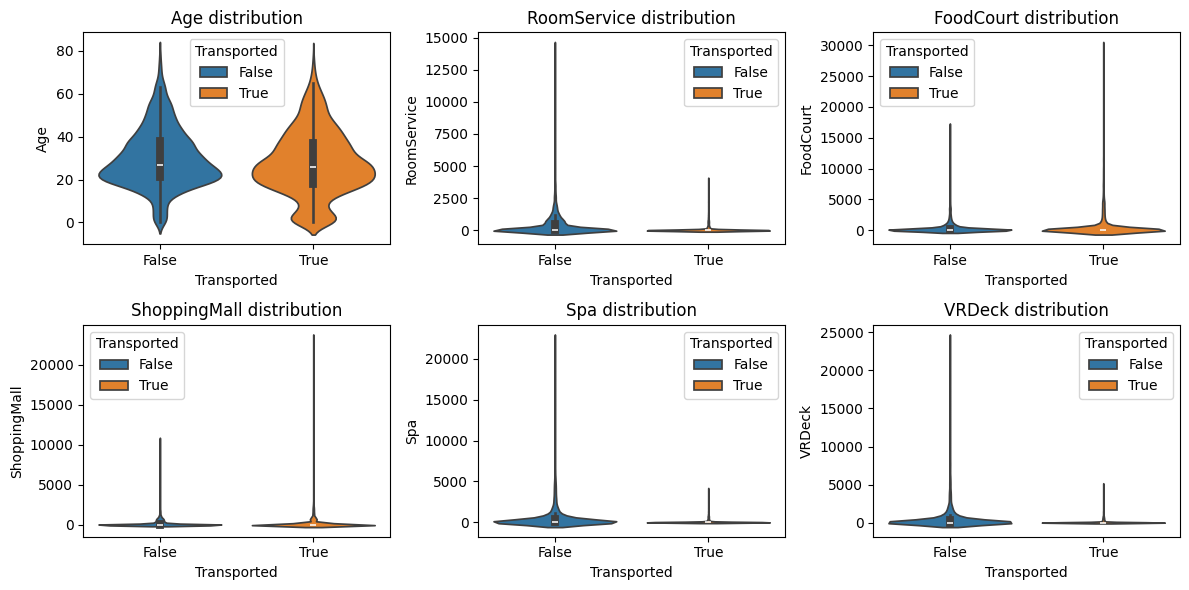

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 6))
i = j = 0
for index, feature in enumerate(numeric_features):
    i = index // 3
    j = index % 3
    sns.violinplot(data = train_data, y = feature, x = "Transported", hue = "Transported", ax = ax[i, j])
    ax[i, j].set_title(f"{feature} distribution")
fig.tight_layout()
plt.show()

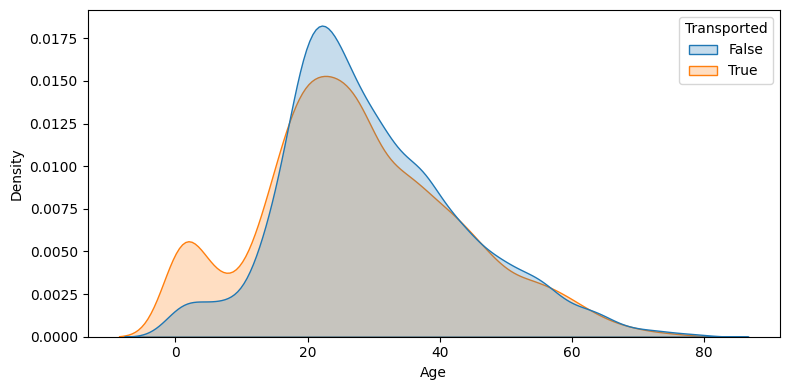

In [9]:
plt.figure(figsize = (8, 4))
sns.kdeplot(data = train_data, x = "Age", hue = "Transported", fill = True)
plt.tight_layout()
plt.show()

### Categorial features

In [10]:
categorical_features = train_data.select_dtypes("object").drop(columns = "PassengerId").columns
categorical_features

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'], dtype='object')

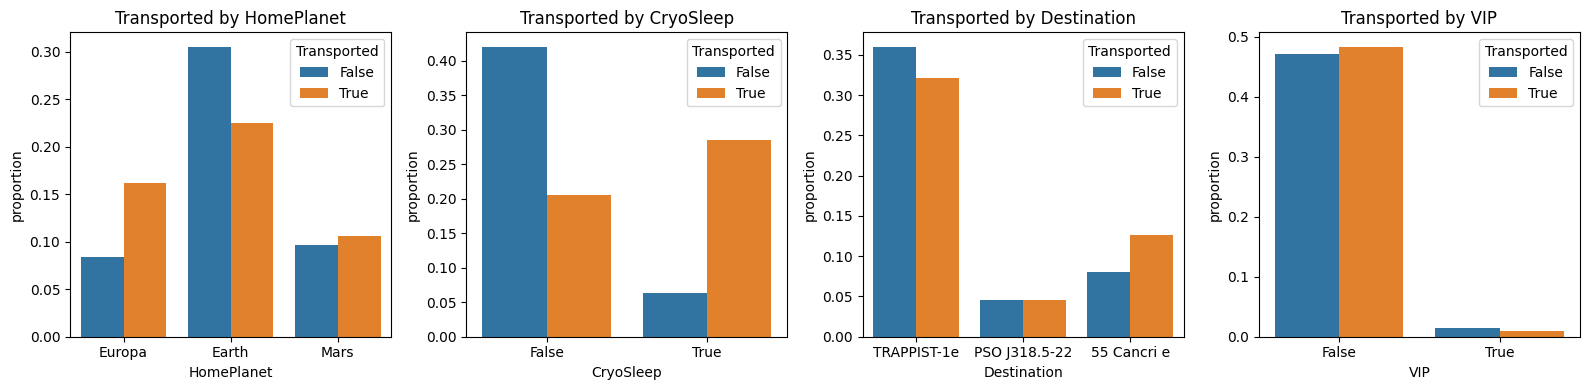

In [11]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))
j = 0
for index, feature in enumerate(["HomePlanet", "CryoSleep", "Destination", "VIP"]):
    j = index % 4
    sns.countplot(data = train_data, x = feature, hue = "Transported", stat = "proportion", ax = ax[j])
    ax[j].set_title(f"Transported by {feature}")
fig.tight_layout()
plt.show()

## Feature engineering

### Missing data

In [12]:
train_df = train_data.drop(columns = "Transported")
test_df = test_data.copy()
target = train_data["Transported"]

In [13]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [14]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

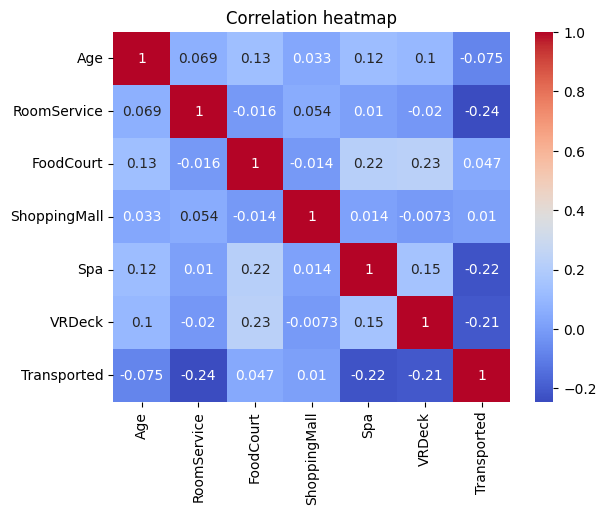

In [15]:
corr_matrix = train_data.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [16]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines


In [17]:
is_null_values = pd.concat([train_df.isnull().sum(), train_df.dtypes], axis = 1).rename(columns = { 0: "MissingValues", 1: "Dtype" })
is_null_values.sort_values(by = "MissingValues", ascending = False)

,MissingValues,Dtype
CryoSleep,217,object
ShoppingMall,208,float64
VIP,203,object
HomePlanet,201,object
Name,200,object
Cabin,199,object
VRDeck,188,float64
FoodCourt,183,float64
Spa,183,float64
Destination,182,object


### Feature extraction

In [18]:
def preprocessing(data: pd.DataFrame):
    df = data.copy()

    passengerid_split = df["PassengerId"].str.split("_").str
    group = passengerid_split[0]
    number = passengerid_split[1]
    df["GroupId"] = group
    df["PassengerNum"] = number

    cabin_split = df["Cabin"].str.split("/").str
    deck = cabin_split[0]
    cabin_num = cabin_split[1].astype("float64")
    side = cabin_split[2]
    df["Deck"] = deck
    df["CabinNum"] = cabin_num
    df["Side"] = side

    return df.drop(columns = ["Cabin", "Name", "PassengerId"])

In [19]:
train_df_preprocessed = preprocessing(train_df)
test_df_preprocessed = preprocessing(test_df)

In [20]:
train_df_preprocessed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,PassengerNum,Deck,CabinNum,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,F,1.0,S


In [21]:
encoder = HashingEncoder(n_components = 8)

In [22]:
train_df_preprocessed = pd.concat([train_df_preprocessed.drop(columns = "GroupId"), encoder.fit_transform(train_df_preprocessed["GroupId"])], axis = 1)

In [23]:
train_df_preprocessed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CabinNum,Side,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,P,0,0,1,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0.0,S,0,0,0,0,1,0,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0.0,S,0,0,1,0,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0.0,S,0,0,1,0,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1.0,S,0,1,0,0,0,0,0,0


In [24]:
train_df_preprocessed.isnull().sum() > 0

HomePlanet       True
CryoSleep        True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
PassengerNum    False
Deck             True
CabinNum         True
Side             True
col_0           False
col_1           False
col_2           False
col_3           False
col_4           False
col_5           False
col_6           False
col_7           False
dtype: bool

In [25]:
onehot_encoder = OneHotEncoder(drop = "first", sparse_output = False)

In [26]:
passenger_num_encoded = pd.DataFrame(onehot_encoder.fit_transform(train_df_preprocessed[["PassengerNum"]]), columns = onehot_encoder.get_feature_names_out())
train_df_preprocessed = pd.concat([train_df_preprocessed, passenger_num_encoded], axis = 1).drop(columns = "PassengerNum")

In [27]:
train_df_preprocessed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,col_5,col_6,col_7,PassengerNum_02,PassengerNum_03,PassengerNum_04,PassengerNum_05,PassengerNum_06,PassengerNum_07,PassengerNum_08
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
train_df_dummies = pd.get_dummies(train_df_preprocessed, dummy_na = True, drop_first = True)

In [29]:
train_df_dummies

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,True,False,False,False,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,1,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,98.0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,1499.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1500.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,608.0,0,0,0,...,False,False,False,True,False,False,False,False,True,False


In [30]:
scaler = RobustScaler()
train_df_scaled = pd.DataFrame(scaler.fit_transform(train_df_dummies), columns = scaler.feature_names_in_)
train_df_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,0.631579,0.000000,0.000000,0.000000,0.000000,0.000000,-0.513375,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.157895,2.319149,0.118421,0.925926,9.305085,0.956522,-0.513375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.631579,0.914894,47.052632,0.000000,113.813559,1.065217,-0.513375,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.315789,0.000000,16.881579,13.740741,56.423729,4.195652,-0.513375,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.578947,6.446809,0.921053,5.592593,9.576271,0.043478,-0.512173,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.736842,0.000000,89.723684,0.000000,27.847458,1.608696,-0.395552,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,-0.473684,0.000000,0.000000,0.000000,0.000000,0.000000,1.288849,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8690,-0.052632,0.000000,0.000000,69.333333,0.016949,0.000000,1.290051,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8691,0.263158,0.000000,13.802632,0.000000,5.983051,70.326087,0.217613,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
y = train_data["Transported"]

In [32]:
knn_imputer = KNNImputer()
train_df_predicted = pd.DataFrame(knn_imputer.fit_transform(train_df_scaled), columns = knn_imputer.feature_names_in_)
train_df_predicted

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,0.631579,0.000000,0.000000,0.000000,0.000000,0.000000,-0.513375,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.157895,2.319149,0.118421,0.925926,9.305085,0.956522,-0.513375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.631579,0.914894,47.052632,0.000000,113.813559,1.065217,-0.513375,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.315789,0.000000,16.881579,13.740741,56.423729,4.195652,-0.513375,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.578947,6.446809,0.921053,5.592593,9.576271,0.043478,-0.512173,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.736842,0.000000,89.723684,0.000000,27.847458,1.608696,-0.395552,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,-0.473684,0.000000,0.000000,0.000000,0.000000,0.000000,1.288849,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8690,-0.052632,0.000000,0.000000,69.333333,0.016949,0.000000,1.290051,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8691,0.263158,0.000000,13.802632,0.000000,5.983051,70.326087,0.217613,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
train_df_unscaled = pd.DataFrame(scaler.inverse_transform(train_df_predicted), columns = scaler.feature_names_in_)
train_df_unscaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,98.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1499.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,608.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
rf_model = RandomForestClassifier()
cross_val_score(rf_model, train_df_unscaled, y, cv = 10).mean()

0.7947856566538365

In [35]:
lgbm_model = LGBMClassifier()
cross_val_score(lgbm_model, train_df_predicted, y, cv = 10).mean()

e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1706
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1708
[LightGBM] [Info] Numb

0.7848953083872334

In [36]:
variances = {}
for k in [20, 15, 10, 5]:
    pca = PCA(n_components = k)
    pca.fit_transform(train_df_predicted)
    variances[f"{k}"] = pca.explained_variance_ratio_

variances

{'20': array([3.32886712e-01, 2.33781071e-01, 1.93408583e-01, 1.44534581e-01,
        9.35376599e-02, 2.85965661e-04, 2.29403609e-04, 1.49504188e-04,
        1.19051337e-04, 1.13592934e-04, 9.03985315e-05, 7.78075996e-05,
        6.34679554e-05, 6.15965171e-05, 6.07768923e-05, 5.97782649e-05,
        5.89488576e-05, 5.85538351e-05, 5.73624616e-05, 5.67176775e-05]),
 '15': array([3.32886712e-01, 2.33781071e-01, 1.93408583e-01, 1.44534581e-01,
        9.35376599e-02, 2.85965661e-04, 2.29403609e-04, 1.49504188e-04,
        1.19051337e-04, 1.13592934e-04, 9.03985315e-05, 7.78075996e-05,
        6.34679554e-05, 6.15965171e-05, 6.07768923e-05]),
 '10': array([3.32886712e-01, 2.33781071e-01, 1.93408583e-01, 1.44534581e-01,
        9.35376599e-02, 2.85965661e-04, 2.29403609e-04, 1.49504188e-04,
        1.19051337e-04, 1.13592934e-04]),
 '5': array([0.33288671, 0.23378107, 0.19340858, 0.14453458, 0.09353766])}


Number of components to retain to explain at least 95.0% variance: 5

Explained Variance Ratio per Component:
Component 1: 0.3329
Component 2: 0.2338
Component 3: 0.1934
Component 4: 0.1445
Component 5: 0.0935
Component 6: 0.0003
Component 7: 0.0002
Component 8: 0.0001
Component 9: 0.0001
Component 10: 0.0001
Component 11: 0.0001
Component 12: 0.0001
Component 13: 0.0001
Component 14: 0.0001
Component 15: 0.0001
Component 16: 0.0001
Component 17: 0.0001
Component 18: 0.0001
Component 19: 0.0001
Component 20: 0.0001


Number of components to retain to explain at least 95.0% variance: 5

Explained Variance Ratio per Component:
Component 1: 0.3329
Component 2: 0.2338
Component 3: 0.1934
Component 4: 0.1445
Component 5: 0.0935
Component 6: 0.0003
Component 7: 0.0002
Component 8: 0.0001
Component 9: 0.0001
Component 10: 0.0001
Component 11: 0.0001
Component 12: 0.0001
Component 13: 0.0001
Component 14: 0.0001
Component 15: 0.0001


Number of components to retain to explain at least 95.0% v

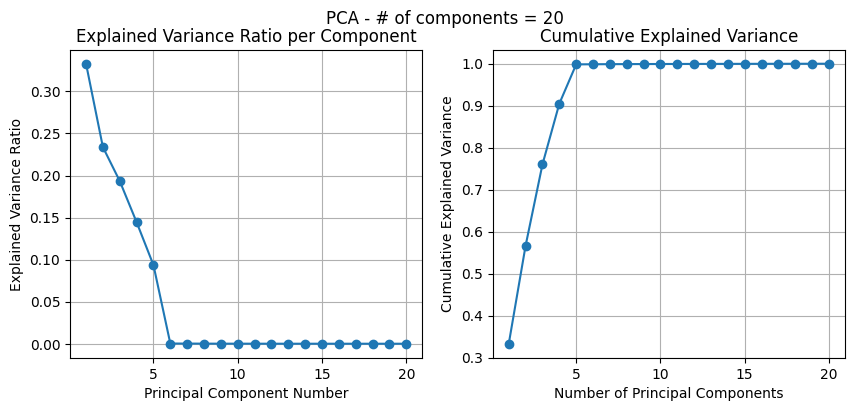

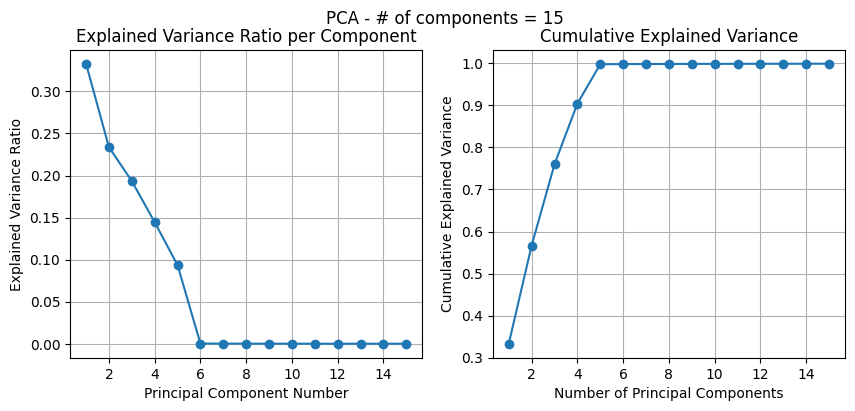

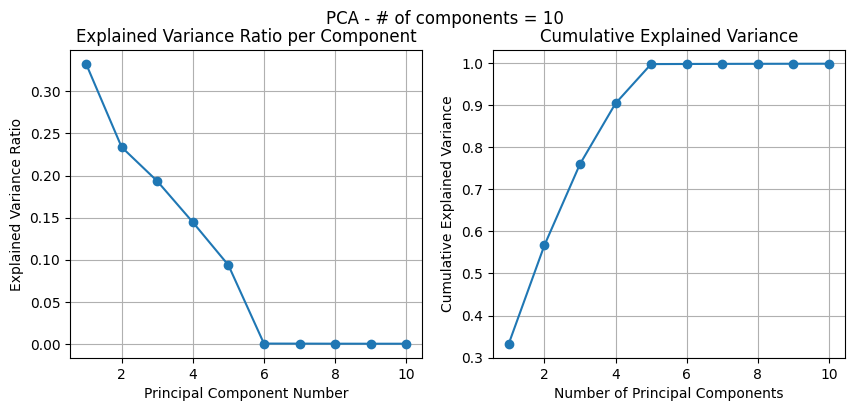

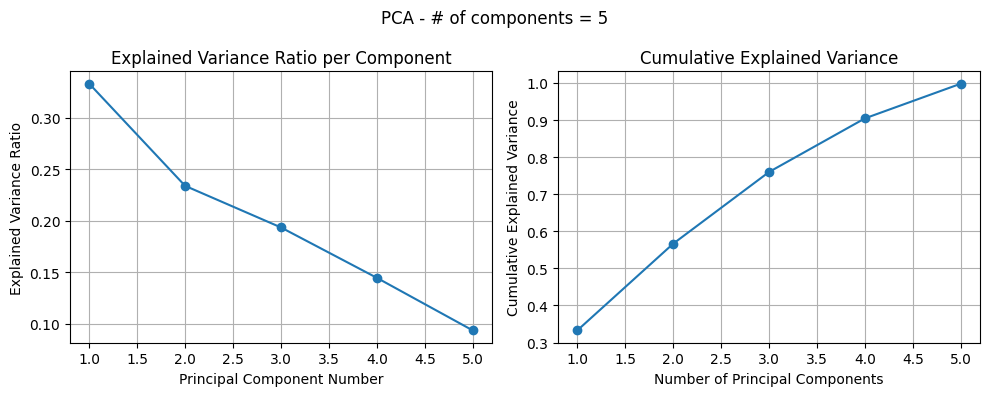

In [37]:
for key, value in variances.items():
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(value) + 1), value, marker = "o")
    plt.suptitle(f"PCA - # of components = {key}")
    plt.title('Explained Variance Ratio per Component')
    plt.xlabel('Principal Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(np.cumsum(value)) + 1), np.cumsum(value), marker='o')
    plt.suptitle(f"PCA - # of components = {key}")
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)

    target_variance = 0.95  # Example: Aim to retain 95% of the variance
    n_components = np.argmax(np.cumsum(value) >= target_variance) + 1
    print(f"\nNumber of components to retain to explain at least {target_variance*100}% variance: {n_components}")

    # You can also print the explained variance ratio for each component
    print("\nExplained Variance Ratio per Component:")
    for i, ratio in enumerate(value):
        print(f"Component {i+1}: {ratio:.4f}")
    print()

plt.tight_layout()
plt.show()



In [38]:
pca = PCA(n_components = 5)
train_df_reduced = pd.DataFrame(pca.fit_transform(train_df_predicted), columns = pca.get_feature_names_out())

In [39]:
cross_val_score(RandomForestClassifier(max_depth = 4), train_df_reduced, y, cv = 10).mean()

0.7904089784796899

In [40]:
# estimator = RandomForestClassifier()
# params = {
#     "n_estimators": [50, 100, 500, 1000, 5000, 10000],
#     "max_depth": range(2, 11)
# }

# searcher = RandomizedSearchCV(
#     estimator = estimator,
#     param_distributions = params,
#     n_iter = 10,
#     cv = 5,
#     refit = True,
#     n_jobs = 6,
#     verbose = 3
# )

# X = train_df_reduced.sample(2000)
# y = train_data.loc[X.index, :]["Transported"]

# searcher.fit(X, y)

# print("Best params: ", searcher.best_params_)
# print("Best score: ", searcher.best_score_)

In [41]:
test_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4185 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
 10  GroupId       4277 non-null   object 
 11  PassengerNum  4277 non-null   object 
 12  Deck          4177 non-null   object 
 13  CabinNum      4177 non-null   float64
 14  Side          4177 non-null   object 
dtypes: float64(7), object(8)
memory usage: 501.3+ KB


In [42]:
test_df_preprocessed.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
GroupId           0
PassengerNum      0
Deck            100
CabinNum        100
Side            100
dtype: int64

In [43]:
test_df_preprocessed = pd.concat([test_df_preprocessed.drop(columns = "GroupId"), encoder.transform(test_df_preprocessed["GroupId"])], axis = 1)
test_df_preprocessed

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CabinNum,Side,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,3.0,S,1,0,0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,...,4.0,S,1,0,0,0,0,0,0,0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,S,0,0,0,1,0,0,0,0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,...,1.0,S,0,0,0,0,0,0,1,0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,...,5.0,S,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,...,1496.0,S,0,0,0,0,0,1,0,0
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,...,NaN,NaN,1,0,0,0,0,0,0,0
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,...,296.0,P,0,0,0,1,0,0,0,0
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,...,297.0,P,0,0,0,0,1,0,0,0


In [44]:
passenger_num_encoded = pd.DataFrame(onehot_encoder.transform(test_df_preprocessed[["PassengerNum"]]), columns = onehot_encoder.get_feature_names_out())
test_df_preprocessed = pd.concat([test_df_preprocessed, passenger_num_encoded], axis = 1).drop(columns = "PassengerNum")

In [45]:
test_df_preprocessed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,col_5,col_6,col_7,PassengerNum_02,PassengerNum_03,PassengerNum_04,PassengerNum_05,PassengerNum_06,PassengerNum_07,PassengerNum_08
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
test_df_dummies = pd.get_dummies(test_df_preprocessed, dummy_na = True, drop_first = True)

In [47]:
test_df_dummies

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,27.0,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0,...,False,False,False,False,False,True,False,False,True,False
1,19.0,0.0,9.0,0.0,2823.0,0.0,4.0,1,0,0,...,False,False,False,False,True,False,False,False,True,False
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
3,38.0,0.0,6652.0,0.0,181.0,585.0,1.0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
4,20.0,10.0,0.0,635.0,0.0,0.0,5.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1496.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
4273,42.0,0.0,847.0,17.0,10.0,144.0,NaN,1,0,0,...,False,False,False,False,False,False,False,True,False,True
4274,NaN,0.0,0.0,0.0,0.0,0.0,296.0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4275,NaN,0.0,2680.0,0.0,0.0,523.0,297.0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [48]:
test_df_scaled = pd.DataFrame(scaler.transform(test_df_dummies), columns = scaler.feature_names_in_)
test_df_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.509769,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.421053,0.000000,0.118421,0.000000,47.847458,0.000000,-0.508566,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.210526,0.000000,0.000000,0.000000,0.000000,0.000000,-0.513375,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.578947,0.000000,87.526316,0.000000,3.067797,12.717391,-0.512173,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.368421,0.212766,0.000000,23.518519,0.000000,0.000000,-0.507364,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,1.285242,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4273,0.789474,0.000000,11.144737,0.629630,0.169492,3.130435,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4274,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-0.157499,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.000000,35.263158,0.000000,0.000000,11.369565,-0.156297,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
test_df_predicted = pd.DataFrame(knn_imputer.transform(test_df_scaled), columns = knn_imputer.feature_names_in_)
test_df_predicted

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.509769,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.421053,0.000000,0.118421,0.000000,47.847458,0.000000,-0.508566,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.210526,0.000000,0.000000,0.000000,0.000000,0.000000,-0.513375,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.578947,0.000000,87.526316,0.000000,3.067797,12.717391,-0.512173,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.368421,0.212766,0.000000,23.518519,0.000000,0.000000,-0.507364,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,1.285242,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4273,0.789474,0.000000,11.144737,0.629630,0.169492,3.130435,0.153411,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4274,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,-0.157499,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,0.389474,0.000000,35.263158,0.000000,0.000000,11.369565,-0.156297,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
test_df_unscaled = pd.DataFrame(scaler.inverse_transform(test_df_predicted), columns = scaler.feature_names_in_)
test_df_unscaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,27.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20.0,10.0,0.0,635.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1496.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0,554.6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4274,29.0,0.0,0.0,0.0,0.0,0.0,296.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,34.4,0.0,2680.0,0.0,0.0,523.0,297.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
test_df_reduced = pd.DataFrame(pca.transform(test_df_predicted), columns = pca.get_feature_names_out())
test_df_reduced

,pca0,pca1,pca2,pca3,pca4
0,-9.651549,-6.973516,-2.780181,-0.964021,-4.457809
1,4.627348,-4.350590,20.218736,38.374881,-5.953579
2,-9.636287,-6.971488,-2.771536,-0.964506,-4.456020
3,43.427041,-7.255233,50.681086,-47.388604,-2.590698
4,-10.108113,16.485613,-3.193049,-2.158989,-5.630263
...,...,...,...,...,...
4272,-9.658125,-6.973040,-2.783387,-0.963293,-4.456867
4273,-1.714839,-6.373294,3.066003,-7.045228,-4.211616
4274,-9.650587,-6.968338,-2.779393,-0.963618,-4.444733
4275,16.542148,-7.096335,14.670336,-20.513872,-3.556584


In [52]:
X = train_df_reduced.copy()
y = train_data["Transported"]
X_test = test_df_reduced.copy()

rf_model = RandomForestClassifier(max_depth = 5)
rf_model.fit(X, y)
y_pred = rf_model.predict(X_test)
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [53]:
submission = pd.concat([test_data[["PassengerId"]], pd.DataFrame(y_pred).rename(columns = {0: "Transported"})], axis = 1)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [54]:
submission.to_csv("./results/first_submission.csv", index = False)

In [55]:
cross_val_score(LGBMClassifier(), X, y, cv = 10).mean()

[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Info] Number

0.7907559223840325

In [56]:
train_df_predicted.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,col_0,col_1,col_2,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_S,Side_nan
0,0.631579,0.000000,0.000000,0.000000,0.000000,0.000000,-0.513375,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.157895,2.319149,0.118421,0.925926,9.305085,0.956522,-0.513375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.631579,0.914894,47.052632,0.000000,113.813559,1.065217,-0.513375,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.315789,0.000000,16.881579,13.740741,56.423729,4.195652,-0.513375,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.578947,6.446809,0.921053,5.592593,9.576271,0.043478,-0.512173,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


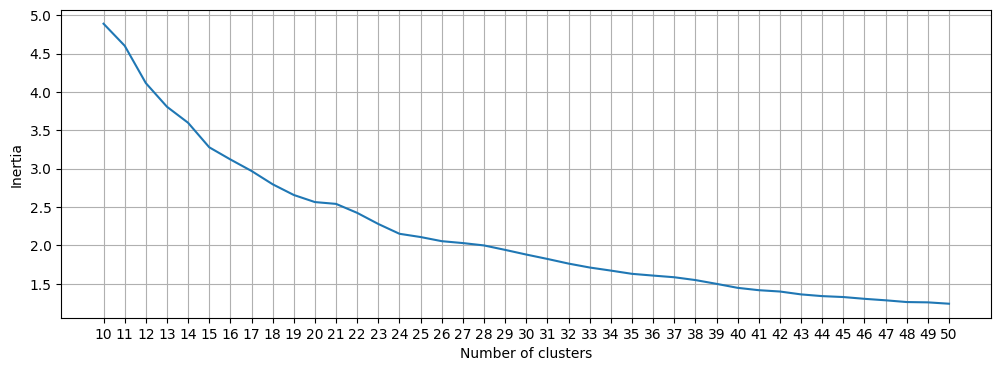

In [89]:
inertias = []
for k in range(10, 51):
    k_means = KMeans(n_clusters = k, random_state = 42)
    k_means.fit(train_df_predicted)
    inertias.append(k_means.inertia_)

plt.figure(figsize = (12, 4))
plt.plot(np.array(inertias) * 1e-6)
plt.grid()
plt.xticks(range(41), range(10, 51))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [62]:
k_means = KMeans(n_clusters = 4)
labels = k_means.fit_predict(train_df_predicted)

In [63]:
train_df["Cluster"] = labels

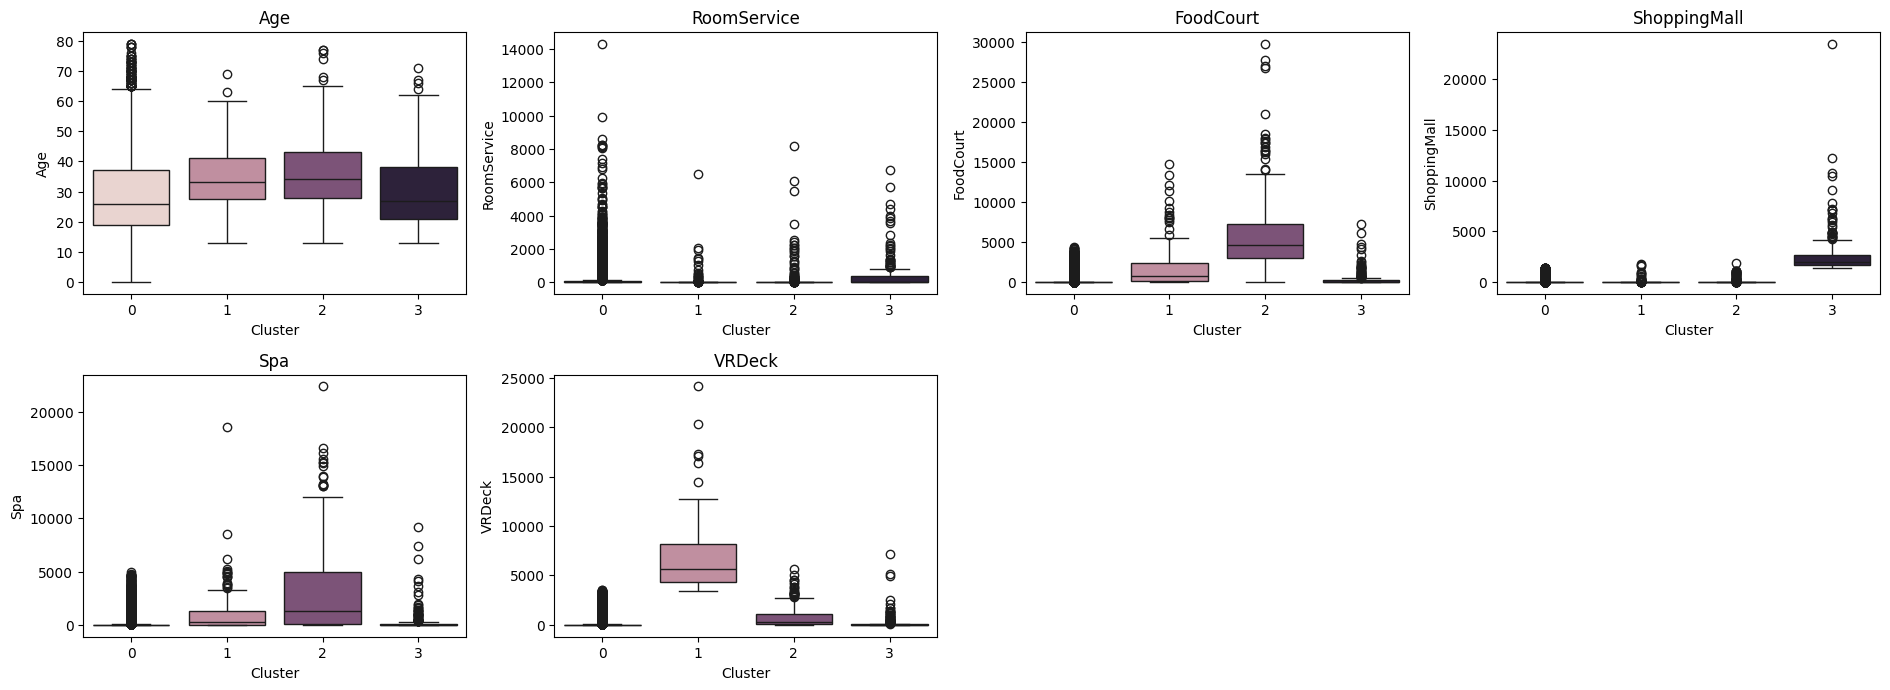

In [65]:
plt.figure(figsize=(19, 10))
for index, col in enumerate(["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]):
    plt.subplot(3, 4, index + 1)
    sns.boxplot(data = train_df, x = "Cluster", y = col, hue = "Cluster", legend = False)
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [67]:
grid_size = 5 * np.sqrt(train_df.shape[0])
grid_size

466.1812952060604

In [74]:
data = train_df_reduced.values
som = MiniSom(x = 22, y = 22, input_len = 5, sigma = 11, learning_rate = .5, random_seed = 42)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")
data.shape

Training...

...ready!


(8693, 5)

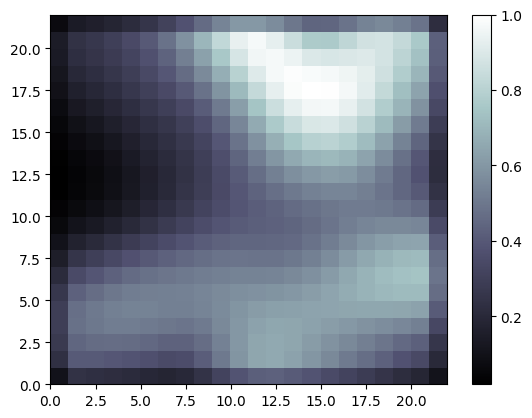

In [75]:
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

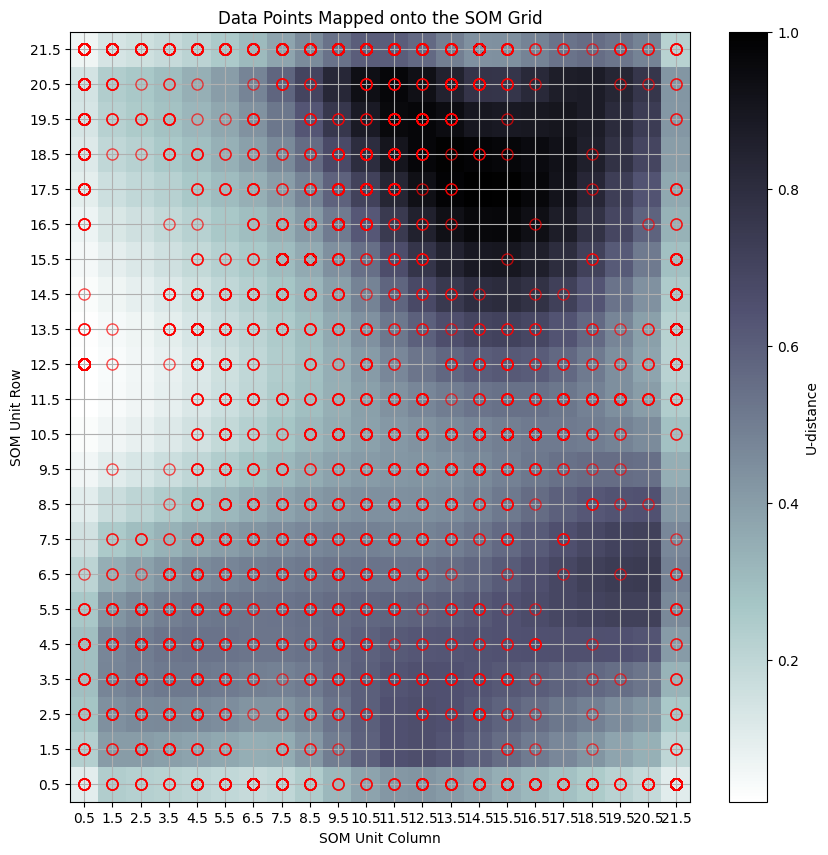

In [76]:
winning_neurons = [som.winner(x) for x in data]

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Display the U-matrix as background
plt.colorbar(label='U-distance')

# Iterate through the winning neurons and plot the data points
for i, win_neuron in enumerate(winning_neurons):
    x_coord, y_coord = win_neuron
    plt.plot(x_coord + 0.5, y_coord + 0.5, 'o', markersize=8, markerfacecolor='None',
             markeredgecolor='r', alpha=0.7) # 'o' for circle, 's' for square, etc.

plt.title('Data Points Mapped onto the SOM Grid')
plt.xlabel('SOM Unit Column')
plt.ylabel('SOM Unit Row')
plt.xticks(np.arange(som._weights.shape[0]) + 0.5)
plt.yticks(np.arange(som._weights.shape[1]) + 0.5)
plt.grid()
plt.show()

e:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


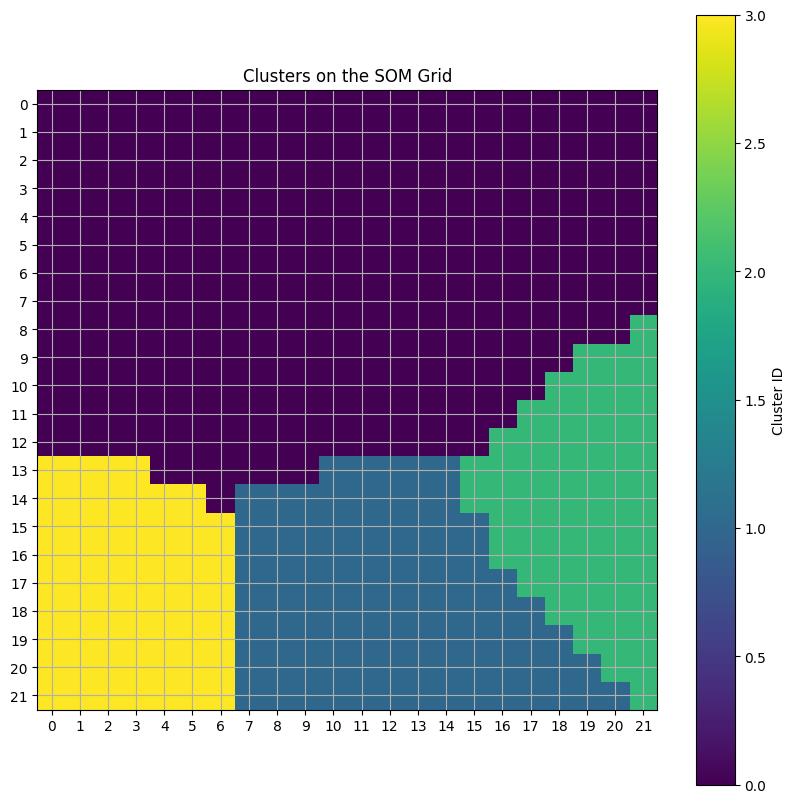

In [95]:
weights = som.get_weights().reshape(-1, 5) # Flatten the 2D grid of weights

# Choose the number of clusters (e.g., based on U-matrix visualization)
n_clusters = 4 # Adjust this based on your observation

# Apply K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(weights)

# Reshape the labels back to the SOM grid
cluster_map = cluster_labels.reshape(som._weights.shape[:2])

# Now 'cluster_map' is a 2D array where each cell contains the cluster label of the corresponding neuron.
# You can visualize this cluster map.
plt.figure(figsize=(10, 10))
plt.imshow(cluster_map, cmap='viridis') # Choose a suitable colormap
plt.colorbar(label='Cluster ID')
plt.title('Clusters on the SOM Grid')
plt.xticks(np.arange(som._weights.shape[0]))
plt.yticks(np.arange(som._weights.shape[1]))
plt.grid(True)
plt.show()

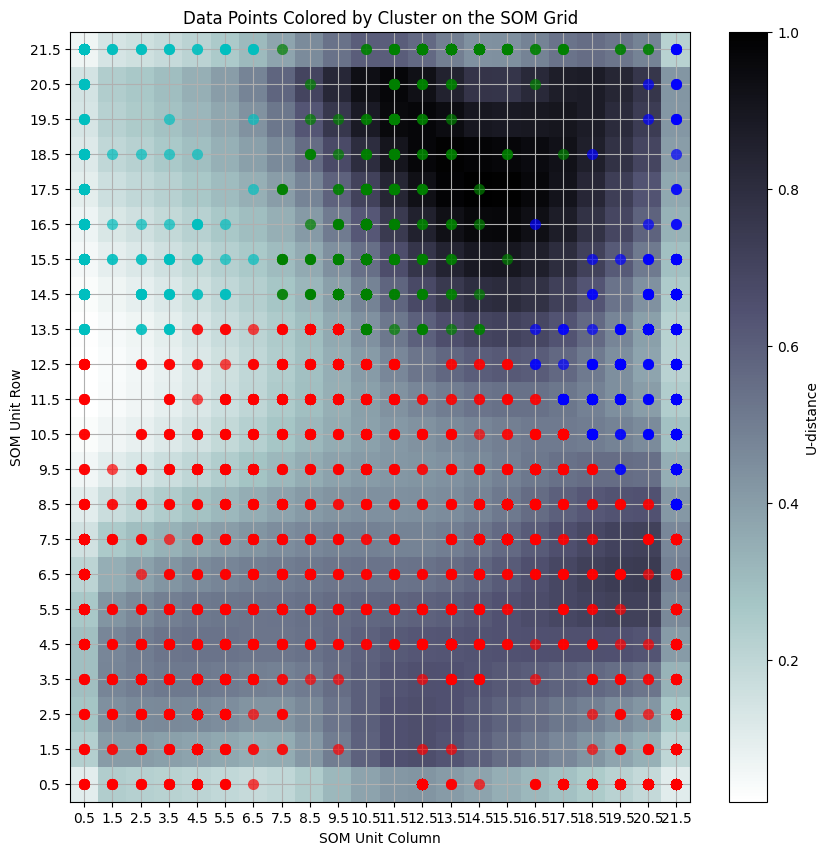

In [98]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='U-distance')

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # Define colors for your clusters

for i, win_neuron in enumerate(winning_neurons):
    row, col = win_neuron
    cluster_id = cluster_map[row, col]
    plt.plot(col + 0.5, row + 0.5, 'o', markersize=8,
             markerfacecolor=colors[cluster_id % len(colors)], # Assign color based on cluster
             markeredgecolor='None', alpha=0.7)

plt.title('Data Points Colored by Cluster on the SOM Grid')
plt.xlabel('SOM Unit Column')
plt.ylabel('SOM Unit Row')
plt.xticks(np.arange(som._weights.shape[0]) + 0.5)
plt.yticks(np.arange(som._weights.shape[1]) + 0.5)
plt.grid()
plt.show()